In [73]:
# =============================
# Heart Failure Prediction
# Models: Logistic Regression, Decision Tree, Random Forest
# =============================

In [74]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ( accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, RocCurveDisplay )

In [75]:
# 2. Load Dataset
url= 'https://raw.githubusercontent.com/Kaju-barnwal/DataSets/refs/heads/main/heart_failure_clinical_records_dataset.csv'
pd.read_csv(url)
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [76]:
# OUTPUT=DEATH_EVENT
# INPUT = age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time

In [77]:
# Basic info about dataset
print("Dataset Shape:", df.shape)      # rows, columns
print(df.info())                       # column datatypes + missing values

Dataset Shape: (299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 3

In [78]:
print("\nTarget Class Distribution (0=Alive, 1=Died):")
print(df['DEATH_EVENT'].value_counts())  # how many survived vs died


Target Class Distribution (0=Alive, 1=Died):
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [79]:
# 3. Split into Input (X) and Output (y)
X = df.drop('DEATH_EVENT', axis=1)  # all features
y = df['DEATH_EVENT']               # target column

In [80]:
# 4. Train-Test Split (70% training, 30% testing)
# stratify=y → ensures same proportion of died/alive in train & test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42, stratify=y )

In [81]:
print(y.shape) #100%
print(y_train.shape) #75%
print(y_test.shape) #25%

(299,)
(209,)
(90,)


In [82]:
# 5. Scaling (ONLY for Logistic Regression, not trees)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)  # fit + transform on train
X_test_scaled = scaler.transform(X_test)        # only transform on test

In [83]:
# =============================
# Logistic Regression
# =============================
# class_weight='balanced' → handles class imbalance
log_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [84]:
# =============================
# Decision Tree
# =============================
# max_depth=5 → prevents overfitting (can tune further)
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [85]:
# =============================
# Random Forest
# =============================
# n_estimators=100 → 100 trees, max_depth=7 → controlled complexity
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [86]:
# =============================
# Evaluation Function (Reusable)
# =============================
def evaluate_model(name, y_test, y_pred, model, X_test):
    """
    This function calculates Accuracy, Precision, Recall, F1, ROC-AUC,
    prints classification report + confusion matrix,
    and returns results for comparison.
    """
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])  # AUC based on probabilities

    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))   # precision, recall, f1 per class
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  # TP/TN/FP/FN

    return [name, acc, prec, rec, f1, auc]

In [87]:
# =============================
# Compare All Models
# =============================
results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred_log, log_model, X_test_scaled))
results.append(evaluate_model("Decision Tree", y_test, y_pred_tree, tree_model, X_test))
results.append(evaluate_model("Random Forest", y_test, y_pred_rf, rf_model, X_test))

# Final Comparison Table
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
print("\n Final Model Comparison ")
print(comparison_df)


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        61
           1       0.68      0.66      0.67        29

    accuracy                           0.79        90
   macro avg       0.76      0.75      0.76        90
weighted avg       0.79      0.79      0.79        90

Confusion Matrix:
 [[52  9]
 [10 19]]

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        61
           1       0.58      0.72      0.65        29

    accuracy                           0.74        90
   macro avg       0.72      0.74      0.72        90
weighted avg       0.77      0.74      0.75        90

Confusion Matrix:
 [[46 15]
 [ 8 21]]

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        61
           1       0.82      0.62      0.71        29

    accuracy    

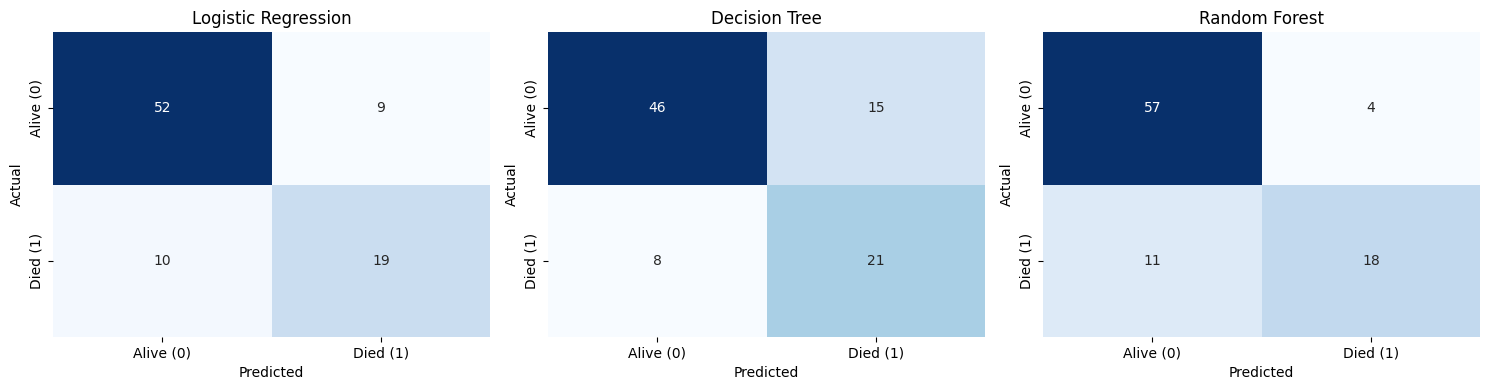

In [88]:
# Plot all confusion matrices side by side
fig, axes = plt.subplots(1, 3, figsize=(15,4))
models = { "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf }

for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
                xticklabels=["Alive (0)", "Died (1)"],
                yticklabels=["Alive (0)", "Died (1)"],
                ax=ax)
    ax.set_title(f"{name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

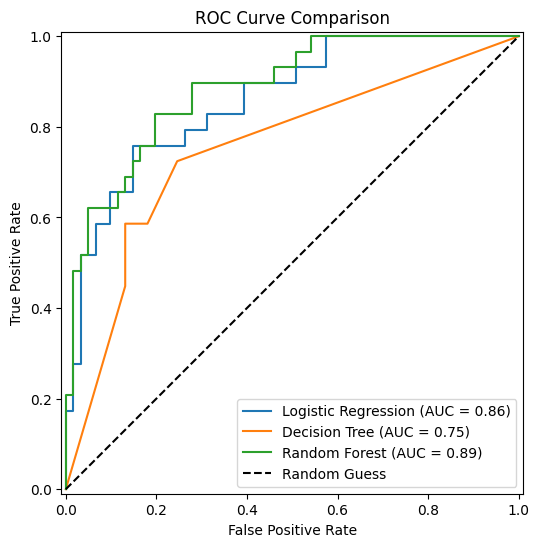

In [91]:
plt.figure(figsize=(7,6))

# Plot ROC curves for all models
RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test, name="Logistic Regression", ax=plt.gca())
RocCurveDisplay.from_estimator(tree_model, X_test, y_test, name="Decision Tree", ax=plt.gca())
RocCurveDisplay.from_estimator(rf_model, X_test, y_test, name="Random Forest", ax=plt.gca())

# Diagonal line for random guessing
plt.plot([0,1], [0,1], 'k--', label="Random Guess")

# Title & legend
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()